In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from IPython.display import HTML, display
import tabulate

import os
import scipy.linalg.blas

In [2]:
def analyze(resultsDir, modelName, thinning):
    hops = modelName + '_HOPS'
    cobra = modelName + '_COBRA'
    sDurationHops = pd.read_csv(os.path.join(resultsDir, hops, hops + "_timestamps.csv"), header=None).iloc[0, 0]
    sDurationCobra = pd.read_csv(os.path.join(resultsDir, cobra, cobra + "_timestamps.csv"), header=None).iloc[0, 0]
   
    sPerSampleHops = sDurationHops
    sPerSampleCobra = sDurationCobra
    print(modelName + " (COBRA): " + str(sPerSampleCobra))
    print(modelName + " (HOPS): " + str(sPerSampleHops))
    
    return sPerSampleHops, sPerSampleCobra

In [3]:
simplices = ['simplex_64D', 'simplex_256D', 'simplex_512D', 'simplex_1024D', 'simplex_2048D']
dimSimplices = [64, 256, 512, 1024, 2048]

models = ['e_coli_core','iAT_PLT_636', 'iJO1366', 'RECON1', 'Recon2.v04', 'Recon3D_301']
dimensionalities = [23, 289, 568, 931, 2428, 5334]

testCaseDims = dictionary = dict(zip(simplices + models, dimSimplices + dimensionalities))
hopsModelS = []
cobraModelS = []
hopsSimplexS = []
cobraSimplexS = []

In [7]:
speedUp = []
for i, model in enumerate(models):
    n, c = analyze('results_hops_25_05_20', model, 1)
    hopsModelS.append(n)
    cobraModelS.append(c)
    speedUp.append(c/n)
for i, model in enumerate(simplices):
    n, c = analyze('results_hops_25_05_20', model, 1)
    hopsSimplexS.append(n)
    cobraSimplexS.append(c)
    speedUp.append(c/n)
print(speedUp)
print(models)
print(simplices)

e_coli_core (COBRA): 1.4249255063016101e-05
e_coli_core (HOPS): 1.44e-07
iAT_PLT_636 (COBRA): 2.49145707830179e-05
iAT_PLT_636 (HOPS): 1.91e-06
iJO1366 (COBRA): 3.18399531839228e-05
iJO1366 (HOPS): 3.0313499999999998e-06
RECON1 (COBRA): 5.2990472159267893e-05
RECON1 (HOPS): 5.438830000000001e-06
Recon2.v04 (COBRA): 7.87057904048995e-05
Recon2.v04 (HOPS): 1.21346e-05
Recon3D_301 (COBRA): 0.00016398212107213898
Recon3D_301 (HOPS): 2.8800071241094867e-05
simplex_64D (COBRA): 1.33108994532104e-05
simplex_64D (HOPS): 7.20156e-08
simplex_256D (COBRA): 1.4545886207570002e-05
simplex_256D (HOPS): 2.45336e-07
simplex_512D (COBRA): 1.66844598015664e-05
simplex_512D (HOPS): 4.5222999999999997e-07
simplex_1024D (COBRA): 1.9484740435152e-05
simplex_1024D (HOPS): 9.708379999999999e-07
simplex_2048D (COBRA): 2.6868407727989603e-05
simplex_2048D (HOPS): 2.25956e-06
[98.95316015983404, 13.04427789686801, 10.503555572244315, 9.742991076990435, 6.48606385088091, 5.693809563851101, 184.83355624629107, 59.

In [5]:
from numpy import median
print("minimal speedup: " + str(min(speedUp)))
print("median speedup: " + str(median(speedUp)))
print("maximum speedup: " + str(max(speedUp)))

minimal speedup: 5.693809563851101
median speedup: 13.04427789686801
maximum speedup: 184.83355624629107


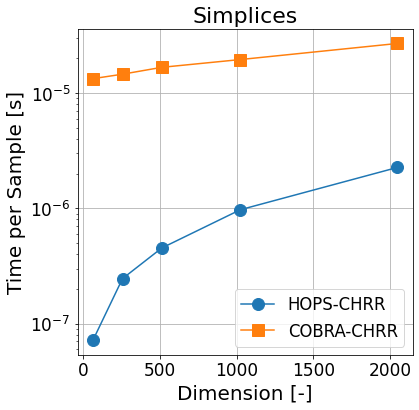

In [6]:
plt.figure(figsize=(6,6))
plt.tight_layout()
plt.title("Simplices", fontsize=22)
plt.semilogy(dimSimplices, hopsSimplexS, label='HOPS-CHRR', marker="o", markersize=12)
plt.semilogy(dimSimplices, cobraSimplexS, label='COBRA-CHRR', marker="s", markersize=12)
plt.legend(fontsize=16.5)
plt.xlabel("Dimension [-]", fontsize=20)
plt.ylabel("Time per Sample [s]", fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xticks(np.arange(0, 2500, step=500))
plt.grid()
plt.savefig('comparisonSimplices.pdf', format='pdf', bbox_inches='tight')
plt.show()

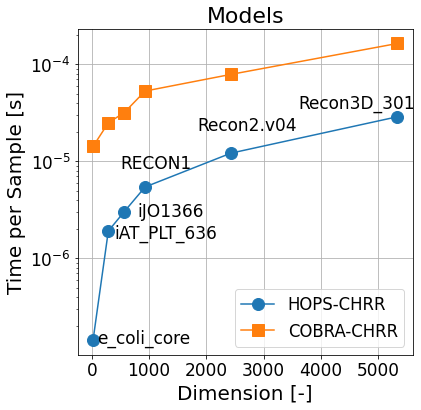

In [7]:
plt.figure(figsize=(6, 6))
plt.tight_layout()
plt.title("Models", fontsize=22)
plt.semilogy(dimensionalities, hopsModelS, label='HOPS-CHRR', marker="o", markersize=12)
plt.semilogy(dimensionalities, cobraModelS, label='COBRA-CHRR',linestyle=None, marker="s", markersize=12)
plt.legend(fontsize=16.5, loc='best')
plt.xlabel("Dimension [-]", fontsize=20)
plt.ylabel("Time per Sample [s]", fontsize=20)
plt.text(100, 1.33e-7, "e_coli_core", fontsize=17)
plt.text(400, 1.6e-6, "iAT_PLT_636", fontsize=17)
plt.text(800, 2.7e-6, "iJO1366", fontsize=17)
plt.text(500, 8.5e-6, "RECON1", fontsize=17)
plt.text(1850, 2.1e-5, "Recon2.v04", fontsize=17)
plt.text(3600, 3.5e-5, "Recon3D_301", fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.grid()
plt.savefig('comparisonModels.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [8]:
def meanOfVecList(inlist):
    means = inlist[0]
    for i in range(1,len(inlist)):
        means+=inlist[i]
    means/=len(inlist)
    return means

In [9]:
def PSRF(data):
    n = len(data[0])
   
    variances = [vals.std(ddof=1)**2 for vals in data]
    if all(v < 1e-15 for v in variances):
        # all variances are so small, they are essentially equal
        return 1
    

    variancesMean = np.array(variances).mean()
    
    means = [vals.mean() for vals in data]
    meansMean = np.array(means).mean()
   
    W = np.array(variancesMean)
    B = np.add.reduce((np.array(means)-meansMean).std(ddof=1)**2)
    varEst = (n - 1.)/n * W  + B
    
    return np.sqrt(varEst / W)

In [10]:
def calculateNumberOfSamplesRequiredForConvergence(resultsDir, modelName):
    hops = modelName + '_HOPS'
    cobra = modelName + '_COBRA'
    resultsHops = pd.read_csv(os.path.join(resultsDir, hops, hops + "_states.csv"), header=None)
    resultsCobra = pd.read_csv(os.path.join(resultsDir, hops, hops + "_states.csv"), header=None)
    start = 2900 if modelName == "Recon3D_301" else 10
    print("start " + str(start) + " " + modelName)
    for numSamples in range(start, 5010, 10):    
        psrfs = []
        for i in range(len(resultsHops.columns)):
            hops = resultsHops.head(numSamples).iloc[:,i].to_numpy()
            cobra = resultsCobra.head(numSamples).iloc[:,i].to_numpy()
            samples = np.split(cobra, 5) +  np.split(hops, 5)
            psrfs.append(PSRF(samples))
        psrf = max(psrfs);
        if psrf < 1.16:
            thinningFactor = 200 if modelName == "Recon3D_301" else 100
            print(modelName + " " + str(numSamples) + " " + str(testCaseDims[modelName]) + " " + str(thinningFactor))
            return numSamples, numSamples*testCaseDims[modelName]*thinningFactor, psrf

In [11]:
requiredNumberOfSamples = {}

In [12]:
#<1.16
# calculate psrfs for simplices
for i, model in enumerate(simplices):
    numSamples, unthinned, psrf = calculateNumberOfSamplesRequiredForConvergence('results_hops_25_05_20', model)
    print(model + ": numSamples " + str(unthinned) + " (" + str(numSamples) + ") psrf: " + str(psrf))
    requiredNumberOfSamples[model] = unthinned

start 10 simplex_64D
simplex_64D 40 64 100
simplex_64D: numSamples 256000 (40) psrf: 1.1238501808367471
start 10 simplex_256D
simplex_256D 60 256 100
simplex_256D: numSamples 1536000 (60) psrf: 1.1135545228362627
start 10 simplex_512D
simplex_512D 90 512 100
simplex_512D: numSamples 4608000 (90) psrf: 1.0748788825978894
start 10 simplex_1024D
simplex_1024D 100 1024 100
simplex_1024D: numSamples 10240000 (100) psrf: 1.1428660053959558
start 10 simplex_2048D
simplex_2048D 140 2048 100
simplex_2048D: numSamples 28672000 (140) psrf: 1.147635277149036


In [13]:
#<1.16
# calculate psrfs for models
for i, model in enumerate(models):
    numSamples, unthinned, psrf = calculateNumberOfSamplesRequiredForConvergence('results_hops_25_05_20', model)
    print(model + ": numSamples " + str(unthinned) + " (" + str(numSamples) + ") psrf: " + str(psrf))
    requiredNumberOfSamples[model] = unthinned

start 10 e_coli_core
e_coli_core 20 23 100
e_coli_core: numSamples 46000 (20) psrf: 1.0752428706266426
start 10 iAT_PLT_636
iAT_PLT_636 70 289 100
iAT_PLT_636: numSamples 2023000 (70) psrf: 1.156535751285834
start 10 iJO1366
iJO1366 140 568 100
iJO1366: numSamples 7952000 (140) psrf: 1.1365258213958855
start 10 RECON1
RECON1 70 931 100
RECON1: numSamples 6517000 (70) psrf: 1.1137495306555056
start 10 Recon2.v04
Recon2.v04 100 2428 100
Recon2.v04: numSamples 24280000 (100) psrf: 1.101978370627926
start 2900 Recon3D_301
Recon3D_301 2900 5334 200
Recon3D_301: numSamples 3093720000 (2900) psrf: 1.1534076631693932


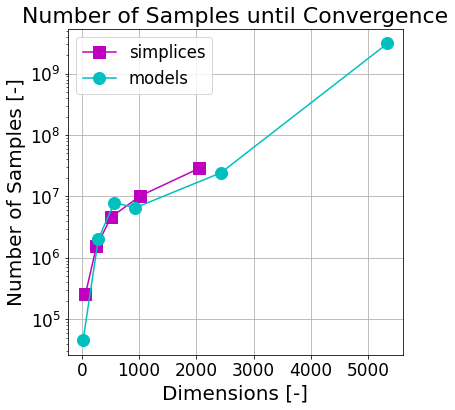

In [14]:
simplicesNumSamples = [s for s in [requiredNumberOfSamples[x] for x in simplices]]
modelsNumSamples = [m for m in [requiredNumberOfSamples[x] for x in models]]
plt.figure(figsize=(6,6))
plt.tight_layout()
plt.title("Number of Samples until Convergence", fontsize=22)
plt.semilogy(dimSimplices, simplicesNumSamples, label='simplices', marker="s", markersize=12, color='m')
plt.semilogy(dimensionalities, modelsNumSamples, label='models', marker="o", markersize=12, color='c')
plt.legend(fontsize=16.5)
plt.xlabel("Dimensions [-]", fontsize=20)
plt.ylabel("Number of Samples [-]", fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.grid()
plt.savefig('samplesUntilConvergence.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [45]:
# time for recon3D convergence
hoursRecon3DCobra = requiredNumberOfSamples['Recon3D_301'] * cobraModelS[-1] / 3600
hoursRecon3DHops =  requiredNumberOfSamples['Recon3D_301'] * hopsModelS[-1] / 3600
print("COBRA required " + str(hoursRecon3DCobra/24) + " days to sample Recon3D_301")
print("HOPS required " + str(hoursRecon3DHops/24) + " days to sample Recon3D_301")

COBRA required 5.871698699112244 days to sample Recon3D_301
HOPS required 1.031242550925926 days to sample Recon3D_301


3093720000